In [2]:
import pandas as pd

# Load the dataset
file_path = 'C:\\Users\\user\\OneDrive\\Desktop\\MIS 544\\diabetic_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

# Summary statistics and info
print(data.describe())
print(data.info())



   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [3]:
import pandas as pd
import numpy as np

# Assuming the DataFrame is named 'data'
# Replace '?' with NaN for a consistent missing value representation
data.replace('?', np.nan, inplace=True)

# Drop the 'weight' column due to high missing values
data.drop('weight', axis=1, inplace=True)

# For demonstration, let's impute missing values in 'race' with the mode (most common value)
# This is a simple imputation strategy; more sophisticated methods might be considered later
if data['race'].isnull().sum() > 0:
    most_common_race = data['race'].mode()[0]
    data['race'].fillna(most_common_race, inplace=True)

# Check missing values count for 'diag_1', 'diag_2', 'diag_3' as an example
missing_diag = data[['diag_1', 'diag_2', 'diag_3']].isnull().sum()
print(missing_diag)

# Proceed based on the output


diag_1      21
diag_2     358
diag_3    1423
dtype: int64


In [4]:
# Impute missing values in 'diag_1', 'diag_2', 'diag_3' with a placeholder indicating 'missing' or 'unknown'
data['diag_1'].fillna('unknown', inplace=True)
data['diag_2'].fillna('unknown', inplace=True)
data['diag_3'].fillna('unknown', inplace=True)

# Confirm imputation by checking missing values again
print(data[['diag_1', 'diag_2', 'diag_3']].isnull().sum())


diag_1    0
diag_2    0
diag_3    0
dtype: int64


In [5]:
# One-hot encode nominal categorical variables
nominal_cols = ['race', 'gender']  # Add other nominal categorical variables as needed
data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)

# Encode 'age' as an ordinal variable preserving the order
# This example assumes 'age' categories are ordered correctly in the dataset; adjust as necessary
age_mapping = {age: idx for idx, age in enumerate(data['age'].unique())}
data['age'] = data['age'].map(age_mapping)

# Display the changes to verify
print(data.head())


   encounter_id  patient_nbr  age  admission_type_id  \
0       2278392      8222157    0                  6   
1        149190     55629189    1                  1   
2         64410     86047875    2                  1   
3        500364     82442376    3                  1   
4         16680     42519267    4                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1        NaN   
1                         1                    7                 3        NaN   
2                         1                    7                 2        NaN   
3                         1                    7                 2        NaN   
4                         1                    7                 1        NaN   

          medical_specialty  num_lab_procedures  ...  metformin-pioglitazone  \
0  Pediatrics-Endocrinology                  41  ...                      No   
1               

In [7]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


In [8]:
# One-hot encode remaining categorical variables in both X_train and X_test
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure both X_train and X_test have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='inner', axis=1)  # Keeps only the columns present in both DataFrames


In [9]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:")
print(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.41      0.02      0.03      2285

    accuracy                           0.89     20354
   macro avg       0.65      0.51      0.49     20354
weighted avg       0.84      0.89      0.84     20354

Confusion Matrix:
[[18018    51]
 [ 2249    36]]
ROC AUC Score:
0.6447124098686617


In [10]:
# Retrieve the model's coefficients
coefficients = lr.coef_[0]

# Pair each coefficient with its corresponding feature name
feature_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort the coefficients to identify the most influential factors
sorted_feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

# Display the sorted list of features and their coefficients
print(sorted_feature_coefficients)


                                         Feature  Coefficient
1306                                   diag_3_42     1.252569
603                                   diag_1_V58     1.194098
740                                   diag_2_332     1.125593
223                                   diag_1_298     1.039990
175                                diag_1_250.41     1.037615
...                                          ...          ...
600                                   diag_1_V55    -1.162873
394                                   diag_1_566    -1.163608
59              medical_specialty_Otolaryngology    -1.166904
65    medical_specialty_Pediatrics-Endocrinology    -1.219165
274                                   diag_1_386    -1.672348

[1699 rows x 2 columns]


In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Balancing the classes with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Note: It's important to apply SMOTE only to the training data to avoid information leakage


In [12]:
from sklearn.feature_selection import SelectFromModel

# Feature selection using Logistic Regression with L1 penalty as the base model
selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', random_state=42))
X_res_selected = selector.fit_transform(X_res, y_res)
X_test_selected = selector.transform(X_test)

# This will reduce the number of features based on importance determined by the L1 penalty


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Assuming logistic regression is retrained with SMOTE and selected features, add:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_res_selected, y_res)

y_pred_lr = lr_model.predict(X_test_selected)

print("Logistic Regression with SMOTE and Feature Selection - Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score:")
print(roc_auc_score(y_test, lr_model.predict_proba(X_test_selected)[:, 1]))


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with SMOTE and Feature Selection - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     18069
           1       0.23      0.05      0.08      2285

    accuracy                           0.88     20354
   macro avg       0.56      0.51      0.51     20354
weighted avg       0.82      0.88      0.84     20354

Confusion Matrix:
[[17722   347]
 [ 2179   106]]
ROC AUC Score:
0.61002701412153


In [18]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:04
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:04
   ---------------------------------------- 0.1/99.8 MB 328.6 kB/s eta 0:05:04
   ---------------------------------------- 0.1/99.8 MB 568.9 kB/s eta 0:02:56
   ---------------------------------------- 0.2/99.8 MB 692.4 kB/s eta 0:02:24
   ---------------------------------------- 0.3/99.8 MB 905.4 kB/s eta 0:01:50
   ---------------------------------------- 0.3/99.8 MB 855.7 kB/s eta 0:01:57
   --------------------


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:

from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_res_selected, y_res)

# Making predictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("XGBoost ROC AUC Score:")
print(roc_auc_score(y_test, xgb_model.predict_proba(X_test_selected)[:, 1]))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     18069
           1       0.19      0.10      0.13      2285

    accuracy                           0.85     20354
   macro avg       0.54      0.52      0.53     20354
weighted avg       0.81      0.85      0.83     20354

XGBoost Confusion Matrix:
[[17109   960]
 [ 2055   230]]
XGBoost ROC AUC Score:
0.6083051681416229


In [20]:
# Extracting feature importances
feature_importances = xgb_model.feature_importances_
selected_features = X_train.columns[selector.get_support()]

# Mapping importances to the selected features
importances_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print(importances_df.head(10))  # Displaying top 10 features


              Feature  Importance
1458     metformin_Up    0.026474
1486   insulin_Steady    0.024783
1456     metformin_No    0.021938
1492  diabetesMed_Yes    0.021547
1487       insulin_Up    0.017059
1485       insulin_No    0.016041
1473     glyburide_Up    0.013783
1468     glipizide_No    0.011238
1471     glyburide_No    0.010578
23      payer_code_MD    0.009618


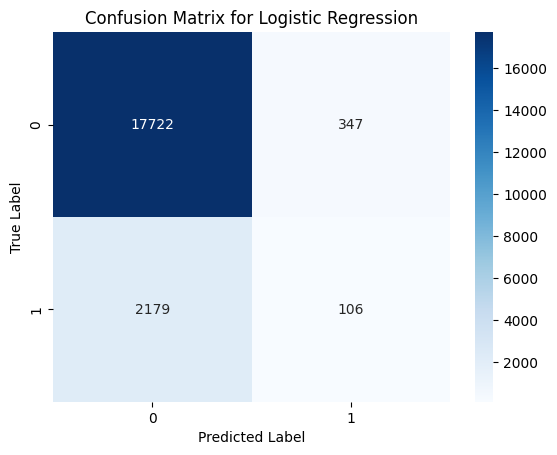

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


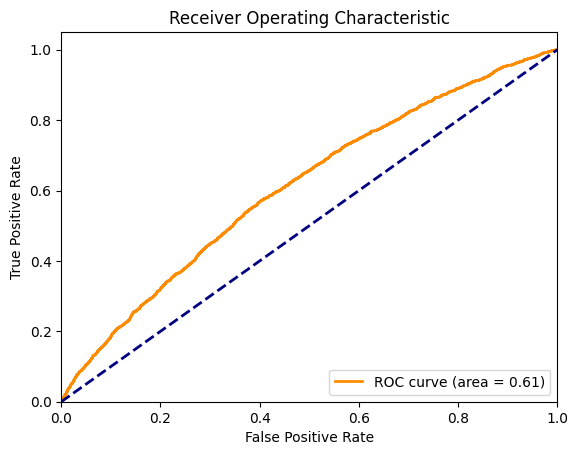

In [25]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test_selected)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


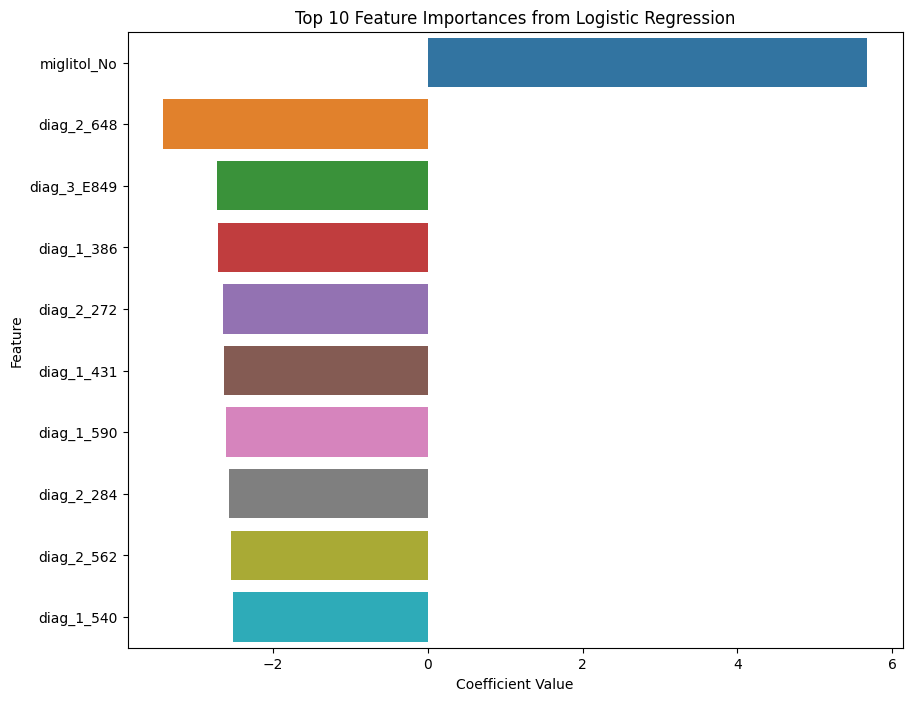

In [26]:
# Get selected feature names
selected_features = X_train.columns[selector.get_support()]

# Get coefficients of the Logistic Regression model
coefficients = lr_model.coef_[0]

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Coefficient': coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df.head(10), x='Coefficient', y='Feature')
plt.title('Top 10 Feature Importances from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()
